<a href="https://colab.research.google.com/github/SettibathulaJyothi/Machine-Learning-and-Deep-Learning-Projects/blob/main/sentiment_analysis_on_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Step 2: Load and Preprocess the Data
vocab_size =10000 #Top words to consider
max_length =200 #Maximum words per review
input_dim = vocab_size
(x_train, y_train), (x_test, y_test) =imdb.load_data(num_words=vocab_size)
#Pad sequences to ensure uniform length
x_train =pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test= pad_sequences(x_test, maxlen=max_length, padding ='post', truncating='post')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Step 3: Build the Neural Network Model
model=keras.Sequential([
keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
keras.layers.Dense (64, activation ='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(1, activation='sigmoid')
])# Sigmoid activation for binary classification ])
#Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
#Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Step 4: Train the Model
history= model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 177s 437ms/step - accuracy: 0.5150 - loss: 0.6904 - val_accuracy: 0.6024 - val_loss: 0.6428
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 191s 411ms/step - accuracy: 0.6051 - loss: 0.6439 - val_accuracy: 0.5759 - val_loss: 0.6668
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 370ms/step - accuracy: 0.6630 - loss: 0.6176 - val_accuracy: 0.5929 - val_loss: 0.6392
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 368ms/step - accuracy: 0.5971 - loss: 0.6389 - val_accuracy: 0.6272 - val_loss: 0.6356
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 219s 413ms/step - accuracy: 0.7265 - loss: 0.5278 - val_accuracy: 0.8426 - val_loss: 0.3699


In [5]:
#Step 5: Evaluate the Model
test_loss, test_acc= model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8425 - loss: 0.3683
Test Accuracy: 0.8426


In [6]:
# Step 6: Make Predictions
new_review = [[1, 45, 6, 200, 54]]  # Example tokenized input
new_review_sequence = pad_sequences(new_review, maxlen=max_length)
prediction = model.predict(new_review_sequence)
print("Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Positive


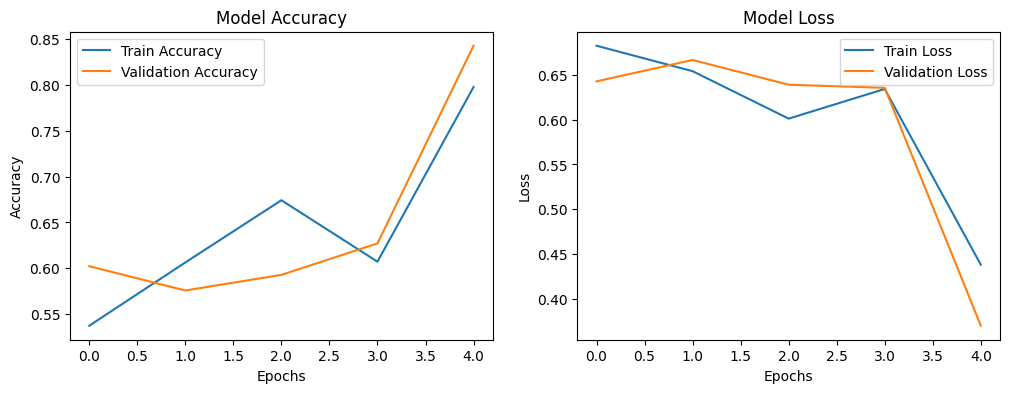

In [7]:
# Step 7: Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()